<a href="https://colab.research.google.com/github/z5381940/szx_blog/blob/main/Week-02-Exercise02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)


© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.

# Week 2: Linear Prediction
# Exercise: Diabetes Hospitalisations - Logistic Regression with L1-norm and L2-norm Regularization (Lasso and Ridge).

# 1. Introduction
Following the visualisation and manipulation stages (data mining and machine learning work-flow), we are now going to fit/build a predictive model.
[Online resources](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

<b>Goal/Research question:</b> <font color=green> <b> our final goal is to build a predictive algorithm to predict readmission to hospital 30 days after discharge. </b></font>

## 1.1. Regression with L1-norm Regularization (Lasso) and L2-norm Regularization (Ridge)

In this exercise, we are going to fit a logistic regression to our data set, by using two techniques that constrain (or regularize) the coefficient estimates with a L1-norm (Lasso regularization) and a L2-norm regularization (Ridge regularization).

1. The Lasso regularization will shrink the coefficient estimates towards zero or <b>directly to zero</b>. For this last reason, Lasso regularization will also do feature selection (those features that are not zero in the model).

2. The Ridge regularization will shrink the coefficient estimates **towards zero**.

The advantage of regularization versus plain least squares has to do with the bias-variance trade off. For more information, read the book [An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf).


## 1.2. Aims:
 1. To build a predictive model <b>using logistic regression with L1-norm and L2-norm regularization of the coefficient estimates</b> (Lasso and Ridge regularization).
 2. To choose input variables.
 3. To manipulate features: standardization.
 4. To use training and test sets.
 5. To continue becoming familiar with the diabetes inpatient hospital dataset and the clinical terms contained in it.

It aligns with all the learning outcomes of our course:


1. Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2. Design machine learning tasks for Health Data Science scenarios.
3. Apply machine learning workflow to health data problems.
4. Generate knowledge via the application of machine learning techniques to health data.


## 1.3. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

## 1.4. Tips
1. Run all the cells in sequence (one at a time), using the "Run" button.
2. To edit this notebook, just double-click in each cell. Choose between "Code" cell or text "Markdown" cell in the combo-box above.
3. If you want to save your notebook, please make sure you press "the floppy disk" icon button above.
4. To clean the content of all cells and re-start Notebook, please go to Cell->All Output->Clear

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**.

# 2. Docstring:

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments).

<b> Write the answer here:</b>
#####################################################################################################################

(double-click here)


#####################################################################################################################

# 3. Load the dataset stored in pickle (from Exercise 1)

**Let's load the dataset that we prepared in the previous exercise of this Chapter.** Please note that we stored the dataset using pickle. Now, we will load this dataset, using 'pickle' ([more information](https://docs.python.org/3/library/pickle.html))

In [2]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn',
            'grid', 'lime', 'shap', 'scikit-learn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required
del installed
del missing

Installing:  {'lime', 'shap', 'grid'}


In [3]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display

In [4]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `project_path`. Otherwise, all the data will be lost after you close the session.

In [5]:
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'week02'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

In [6]:
import pickle
pickle_path = Path(project_path) /'hospital_data.pickle'

# Load dataset stored in pickle in Exercise 1
with open(pickle_path, 'rb') as data:
    hospital = pickle.load(data)

hospital.head()

,los,Age,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_outpatient,sex_Female,...,admission_source_grouped_Other,admission_source_grouped_Physician Referral,admission_source_grouped_Transfer from SNF,admission_source_grouped_Transfer from another health care facility,admission_type_grouped_Elective,admission_type_grouped_Emergency,admission_type_grouped_Not Available/Null,admission_type_grouped_Trauma Centre,admission_type_grouped_Urgent,readmission
0,2,79,9,38,0,12,0,0,0,1,...,0,0,0,0,1,0,0,0,0,no
1,5,59,8,49,0,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no
2,2,33,5,62,0,15,1,0,1,1,...,0,0,0,0,1,0,0,0,0,no
3,6,42,9,77,0,30,0,0,0,1,...,0,0,0,0,1,0,0,0,0,no
4,1,62,7,13,5,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no


In [7]:
hospital.columns

Index(['los', 'Age', 'number_diagnoses', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_inpatient', 'number_outpatient', 'sex_Female', 'sex_Male',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'group_name_1_Blood_&_immune', 'group_name_1_CNS',
       'group_name_1_Cancer', 'group_name_1_Cardiac_&_circulatory',
       'group_name_1_Digestive', 'group_name_1_Endocrine',
       'group_name_1_Infectious', 'group_name_1_Mental_&_Substance',
       'group_name_1_Other', 'group_name_1_Respiratory',
       'group_name_2_Blood_&_immune', 'group_name_2_CNS',
       'group_name_2_Cancer', 'group_name_2_Cardiac_&_circulatory',
       'group_name_2_Digestive', 'group_name_2_Endocrine',
       'group_name_2_Infectious', 'group_name_2_Mental_&_Substance',
       'group_name_2_Other', 'group_name_2_Respiratory',
       

# 4. Feature scaling: standardizing the features

For some of the methods covered in this chapter, specifically ridge and lasso regression, it is best to standardize the features (see book  [An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)).

 **To standardize a feature**, subtract the sample mean, $\bar x$, and then divide by its estimated standard deviation, $s$. This process results in the standardized features all having a standard deviation of 1 and a mean of 0. This makes each feature to have the same shape and spread, so that no single feature dominates the regression based purely on its scaling and distribution.<p>

If you want to read a bit more about this issue, I leave some links here:

1. Read the section related to this topic (it used to be page 217, I am not sure if it has changed), from the book  [An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf).

    This the mathematical formula for standardizing features as per the book "Tibshirani:

 ![alt text](https://drive.google.com/uc?export=view&id=1539bqr47y_vWM1iONl2kuNUtFPcXvGrK)


2. [Towards Data Science](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
3. [One of the forums in which the ML community is very active](https://stats.stackexchange.com/questions/290958/logistic-regression-and-scaling-of-features)


Let's standardize our features:
[`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Interpretation of beta coefficients**:

Keep in mind that the interpretation of regression coefficients becomes more complicated after the features are standardized. For instance, consider multiple linear regression. Prior to standardization, a unit change in $X_j$ corresponds to a change of $\hat \beta_j$ to the predicted response. Simple. However, after standardization of $X_j$, the interpretation of the coefficients becomes: for every increase of <b>one standard deviation</b> in $X_j$, the predicted response changes by $\hat \beta_j$ standard deviations. Still manageable, but not as straight forward.<p>

First, we split the hospital data set into two DataFrames: the features, stored in X, and the target, stored in y.

In [8]:
X = hospital.drop(['readmission'], axis = 1)
y = hospital[['readmission']].values

Now let's split the data into a training and test set. We will include the optional argument 'stratify = y' to preserve the ratio between readmission = NO to readmission = YES.

Check the API for the function `train_test_split` to fully understand what `stratify` does: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In this case, this function belongs to the library `scikit-learn`, that's why we visi the `scikit-learn's` API. Every library (for example `pandas`, `lime`, `shap`, ...) has its own help or API, so it is imporant to be familiar with them.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25,random_state=0)
# stratify = y means we wish to preserve the ratio of y in the test and training sets

In [11]:
# Sanity Check:

# Check that proportions are maintained:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['readmission']
y_train_df = pd.DataFrame(y_train)
y_train_df.columns = ['readmission']

print('*********************************************************************************')
print(f"""Number of records in original data frame (hospital): {len(y)},
Proportion of readmission in original data frame (hospital):\n {hospital.readmission.value_counts('NO')}\n
********************************************************************************* \n
Number of records in test set: {len(y_test)},
Proportion of readmission in test set:\n {y_test_df.readmission.value_counts('NO')}\n
********************************************************************************* \n
Number of records in training set: {len(y_train)},
Proportion of readmission in train set:\n {y_train_df.readmission.value_counts('NO')}
""")
print('*********************************************************************************')

*********************************************************************************
Number of records in original data frame (hospital): 69267, 
Proportion of readmission in original data frame (hospital):
 no     0.827927
yes    0.172073
Name: readmission, dtype: float64

********************************************************************************* 

Number of records in test set: 17317, 
Proportion of readmission in test set:
 no     0.827915
yes    0.172085
Name: readmission, dtype: float64

********************************************************************************* 

Number of records in training set: 51950, 
Proportion of readmission in train set:
 no     0.827931
yes    0.172069
Name: readmission, dtype: float64

*********************************************************************************


We can see that the training and test set have maintained the proportion of NO:YES response from the original data.

**Returning to the process of standardization. Now, we need to make a choice as to whether to standardize the dummy variables, or not.**<p>
    According to Robert Tibrishani, the author of the lasso method,  "*The lasso* (and ridge) *method requires initial standardization of the regressors, so that the penalization scheme is fair to all regressors. For categorical regressors, one codes the regressor with dummy variables and then <b> standardizes the dummy variables </b>*".<p>

If you want to read a bit more about why we should standarize our variables, I leave you here a couple of links:

1. Paper written by Robert Tibshirani of Stanford University, one of the creators of Ridge and Lasso (click [here](https://onlinelibrary.wiley.com/doi/pdf/10.1002/(SICI)1097-0258(19970228)16:4%3C385::AID-SIM380%3E3.0.CO;2-3) and read for the paragraph I wrote above). I include the paper in the data folder of the GitHub too.
2. [A forum discussion](https://stats.stackexchange.com/questions/69568/whether-to-rescale-indicator-binary-dummy-predictors-for-lasso/120600)

Now let's define the scaler we will use, which we decide is `StandardScaler`. `StandardScaler` performs the standardization described at the beginning of this section. We can also easily replace one preprocessing algorithm with another by simply changing the scaler definition at this step. For instance, instead of using `StandardScaler`, we could have used `MinMaxScaler`, or some other alternative.

[More information](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [12]:
scaler = StandardScaler()

### <font color='blue'> <b>Very very very very important!:</b></font>

<font color='blue'> Now we fit the scaler to the training set only. It is important that we fit the scaler to **the training set only** and then apply that same scaler to the test set (remember that the test set is never seen until the very end, once our model has been fully trained).

The purpose of having a test set is to mimic the situation where your model is making prediction decisions in the real world, when you do not have access to the true response. Therefore, we cannot use the test set for *anything* except comparing to predicted values. We treat the test as "the future data" that we will receive once the algorithm has been trained. This means we cannot use the test set to fit the scaler as the test set is considered "future data".</font>

Standardize features means to subtract the mean and divide by the standard deviation.
In this step, we calculate the actual means and variances for each feature in  <font color='red'> THE TRAINING SET.</font>

[`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [13]:
scaler.fit(X_train) # Compute the mean and std to be used for later scaling.

StandardScaler()

To actually scale the data, use the transform method.

In [14]:
# rescale the training data
X_train_scaled = scaler.transform(X_train) # perform standardization by centering and scaling.

In [15]:
# Check
X_train_scaled

array([[-0.40924962, -0.07785674,  0.59406184, ..., -0.34034762,
        -0.01582098,  2.21345585],
       [ 0.16427908,  1.10266607,  0.59406184, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [-0.40924962,  0.04640882,  0.59406184, ..., -0.34034762,
        -0.01582098, -0.45178222],
       ...,
       [-0.40924962,  0.17067438,  0.59406184, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [-0.21807339, -1.81757456,  0.16457672, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [ 1.69368897, -0.38852064, -1.12387867, ...,  2.93817246,
        -0.01582098, -0.45178222]])

To apply predictive models to the scaled data, we also need to transform the test set.

In [16]:
# scale the test data
X_test_scaled = scaler.transform(X_test)

In [16]:
# Check
X_test_scaled

array([[-0.21807339,  0.48133828, -1.12387867, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [-0.02689715, -0.13998952,  0.59406184, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [-0.40924962,  1.72399387,  0.59406184, ...,  2.93817246,
        -0.01582098, -0.45178222],
       ...,
       [-0.40924962,  1.16479885, -1.12387867, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [-0.7916021 , -2.25250402, -1.12387867, ..., -0.34034762,
        -0.01582098, -0.45178222],
       [ 0.73780779,  0.97840051, -1.55336379, ..., -0.34034762,
        -0.01582098, -0.45178222]])

# 5. Logistic Regression

Logistic regression is used for *binary classification*, which means the response, $y$,  is a categorical variable with 2 levels. This is precisely the situation for modelling <b>readmission</b>, which has levels YES and NO. Now, rather than modelling the response variable directly, logistic regression involves modelling the probability that the response variable belongs to a particular category. Logistic regression estimates the probability by the **logistic function**:<p>

\begin{align*}
 P(Y=1 | X) \ &= \frac{e^{\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p}}{1+e^{\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p}} \\
            \ &= \frac{1}{1+e^{-(\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p)}}
\end{align*}



Now, the reason we model the probability via the logistic equation is to 'squash' the output of the model to the range (0,1). This is required as probabilities must be between 0 and 1 (there cannot be a negative chance of occurrence and there cannot be a greater than certain chance of occurrence).<p>

## Logit Function and Log Odds


We can also rearrange the logistic function into what is known as the **logit function**:<p>
    \begin{equation*}
log\left(\frac{P(y=YES)}{1-P(y=YES)}\right) = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
\end{equation*}<p>
    Now, the quantity $\frac{P(y=YES)}{1-P(y=YES)}$ has a special interpretation. It is the *odds ratio* of an event occuring, and can take on any value between $0$ and $\infty$. Notice that $1-P(y=YES)$ is the probability that y is *not* YES, so the odds ratio is the probability that $y = YES$ over the probability that $y\ne YES$. This shows that logistic regression essentially involves modelling the *log odds* of an event via a linear regression model.

## Likelihood Function

Remember that we encode YES as 1, and NO as 0. <p>
    Now we will go a little bit further. The way in which the model is fitted is more complicated than linear regression. For logistic regression, we choose the beta coefficients by the method of **maximum likelihood**. Intuitively, we try to find values for the beta coefficients such that the probability is close to 1 when the true value is YES, and close to 0 when the true value is NO. We can express this mathematically as trying to *maximise* the **likelihood function**:<p>



\begin{align*}
 L(\beta|X) \ &= \prod_{i: y_i = 1}{P(y_i = 1)}\prod_{i': y_i' = 0}{P(y_i=0)} \\
            \ &= \prod_{i: y_i = 1}{P(y_i = 1)}\prod_{i': y_i' = 0}{[1 - P(y_i = 1)]}
\end{align*}


Don't be intimidated by this. Let's unpack: the $\prod$ sign just means 'multiply everything together', similar to how the familiar $\sum$ operates. Below the first $\prod$, we see '$i: y_i = 1$', which means 'do the multiplying for every i such that $y_i = 1$'. Similarly, below the second $\prod$ we see '$i: y_i = 0$', which means 'do the multiplying for every i such that $y_i = 0$'. Finally, $P(y_i = 1)$ means 'the probability that $y_i = YES$.<p>

The details are not so important, so don't worry too much if you are not familiar with this notation. To maximise the likelihood, we use the convenient property that maximising the likelihood is equivalent to maximising the logarithm of the likelihood, which converts the above products into sums. This is helpful as sums are easier to maximise via differentiation methods. In addition, it is convenient to code the two-class via a 0/1 response $y_i$.
The **log-likelihood** can be written:<p>

\begin{align*}
 \textit {l} (\beta|X)) \ &= log(L(\beta|X)) \\
 \ &= \sum_{i: y_i = 1}{log(P(y_i = 1))} + \sum_{i: y_i = 0}{log(1-P(y_i=1))} \\
            \ &= \sum_{i}^{N} {y_i log(P(y_i = 1))} + \sum_{i}^N{(1-y_i)log(1-P(y_i=1))} \\
            \ &= \sum_{i}^{N} {\left[y_i log(P(y_i = 1))+ (1-y_i)log(1-P(y_i=1))\right]} \\
\end{align*}


Recall that $P(y=1) = \frac{1}{1+e^{-(\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p)}}$. Then the log-likelihood function becomes:<p>

\begin{align*}
\textit {l} (\beta|X)) \ &=  \sum_{i}^{N} {\left[y_i log(\frac{1}{1+e^{-(\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p)}})+ (1-y_i)log(1-\frac{1}{1+e^{-(\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p)}})\right]} \\
\end{align*}

Now, we simply maximize this log-likehood expression to find the betas. How do we do that? Very simple, set the first derivative equal to zero. We will leave the full explanation for a more advanced machine learning course, but it is good to know how this *maximum likelihood principle* works because many machine learning algorithms use this principle.<p>
    So, in summary, regular logistic regression chooses beta coefficients by maximising the log-likelihood function, $l(\beta)$.

## L2 Regularization: Ridge

Now, L2 regularization, also known as Ridge Regression, shrinks the beta coefficients by imposing a penalty on their size. This is achieved by adding a penalty term to the likelihood function maximised by regular logistic regression. The strength of the penalty is commonly denoted as C in the [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function. For the sake of clarity, this term is also known as $\lambda$, $\alpha$, or$\frac{1}{C}$ and $(\frac {1}{\lambda}  = \frac {1}{\alpha} = C)$.

 ![alt text](https://drive.google.com/uc?export=view&id=1qkonZrzLiq6rVfluBWfUbad5ixRL93hx)

For more information and to see the original images, read page 215 of the book [An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf))

## L1 Regularization: Lasso

Similarly to L2 regularization, lasso regression shrinks the beta coefficients by adding a penalty term to the likelihood function optimised by regular logistic regression. The difference between the two regularizations is the form of this penalty term. For Ridge, we have penalty term as the beta coefficients *squared*. For Lasso, we have the *absolute value*. Again, the strength of the penalty is commonly denoted as C in the [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function. For the sake of clarity, this term is also known as $\lambda$, $\alpha$, or$\frac{1}{C}$ and $(\frac {1}{\lambda}  = \frac {1}{\alpha} = C)$.

 ![alt text](https://drive.google.com/uc?export=view&id=1_0CoRRnzjWXLaI-Otwcx8wqRQN06-Bxv)

For more information and to see the original images, read page 219 of the book [An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf))

## 5.1 Training a logistic regression model

Now we can train our logistic regression model using ridge regression. The default of logistic regression in <b>scikit-learn</b>  is to include a ridge penalty term in the linear component. The strength of the penalty is commonly denoted as ${C}$ in the [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function. For the sake of clarity: $(\frac {1}{\lambda}  = \frac {1}{\alpha} = C)$.

Small values of $C$ indicate strong regularization, whilst larger values of $C$ indicate weaker regularization. In fact, if we set $C$ to be an extremely large number, then $\lambda$ is effectively zero and the regression reduces to <b> regular logistic regression</b> .

In [18]:
from sklearn.linear_model import LogisticRegression

[More information on `LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

![alt text](https://drive.google.com/uc?export=view&id=1xCsYAddYioVlNoFY9Vi4dZEi-ODnycof)

Let's use the `liblinear` solver that is valid for L1 and L2 regularizations.

### Training a logistic regression model using L1-norm regularization (Lasso)

In [19]:
# C=0.01 as a first step
Log_Reg_L1 = LogisticRegression(C = 0.01 , penalty = 'l1', solver='liblinear').fit(X_train_scaled, y_train.ravel())
# ravel() used to convert y from column vector to 1d array, as required by the method

### Training a logistic regression model using L2-norm regularization (Ridge)

In [21]:
# C=0.01 as a first step
Log_Reg_L2 = LogisticRegression(C = 0.01 , penalty = 'l2',solver='liblinear').fit(X_train_scaled, y_train.ravel())
# ravel() used to convert y from column vector to 1d array, as required by the method

<div class="alert alert-block alert-success">**Start Activity 2**</div>

### <font color='brown'> Question 1: Print the beta coefficients of both logistic regression models and comment on your first impression. Change the C hyperparameter several times and print the beta coefficients again to see how they change.</font>

<font color='green'> Tip:  You can use the following structure: `ModelName.coef_` to print the beta coefficients only.
You can use the following structure: `coefficients = pd.concat([pd.DataFrame(X.columns,columns=['Features']), pd.DataFrame(np.transpose(ModelName.coef_),columns=['Coefficients'])], axis = 1)` to print the beta coefficients of each variable from the diabetes dataset.</font>

In [25]:
# Write Python code here:

# Log_Reg_L1.coef_
coefficients = pd.concat([pd.DataFrame(X.columns,columns=['Features']), pd.DataFrame(np.transpose(Log_Reg_L1.coef_),columns=['Coefficients'])], axis = 1)

In [26]:
# Write Python code here:

# Log_Reg_L2.coef_
coefficients = pd.concat([pd.DataFrame(X.columns,columns=['Features']), pd.DataFrame(np.transpose(Log_Reg_L2.coef_),columns=['Coefficients'])], axis = 1)

<b> Write the answer here:</b>
#####################################################################################################################


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity 2**</div>

**This highlights the important difference between Ridge and Lasso. In Ridge, the coefficients are reduced, but not completely to zero. In Lasso, we have many of the coefficients becoming zero. This is a form of feature selection.**

## 5.2 Making predictions and using 'accuracy' to evaluate the model. Performance Measures.

We now have two model that can predict readmission based on the feature variables. Let's predict the first record in the test set:

<div class="alert alert-block alert-success">**Start Activity 3**</div>

### <font color='brown'> Question 2: Write the Python code to make predictions using the test set with the model that we fitted previously. Make sure you save the predictions as 'y_pred', as this variable will be used later on.</font>

<font color='green'> Tip:  You can use the following structure: `y_pred_Model1 = ModelName.predict(X_test_scaled)`</font>

In [27]:
# Write Python code here for "LASSO"
y_pred_L1 = Log_Reg_L1.predict(X_test_scaled)

In [28]:
# Write Python code here for "RIDGE"
y_pred_L2 = Log_Reg_L2.predict(X_test_scaled)

<div class="alert alert-block alert-warning">**End Activity 3**</div>

It is recommendable to read the section about "Performance Measures" in the textbook "Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems Géron, Aurélien Sebastopol: O'Reilly Media, Incorporated, 2019".

In particular, you can read about Confusion Matrix, Precision and Recall, Precision/Recall Trade-off, The ROC Curve,
and Multiclass Classification. Don't read about cross validation yet, as we will go through it in the next chapter.

<div class="alert alert-block alert-success">**Start Activity 4**</div>

### <font color='brown'> Question 3: Compute the accuracy of both models 'Log_Reg_L1' and 'Log_Reg_L2', and give your opinion about it</font>

<font color='green'> Tip:  You can use the following structure: `round(ModelName.score(X_test_scaled,y_test),3)`</font>

In [29]:
# Write Python code here for "LASSO"
# Use score method to get accuracy of model
round(Log_Reg_L1.score(X_test_scaled, y_test),3)

0.976

In [30]:
# Write Python code here for "RIDGE"
# Use score method to get accuracy of model
round(Log_Reg_L2.score(X_test_scaled, y_test),3)

0.977

<b> Write the answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity 4**</div>

Does the accuracy look like a good resut? But be careful...

In [31]:
print(hospital.readmission.value_counts('no'))

no     0.827927
yes    0.172073
Name: readmission, dtype: float64


We know that readmission = NO accounts for most of the records in our data. This means that if we set a model to always predict NO, we will automatically obtain good model accuracy! This highlights the flaw in using accuracy as the only performance metric, particularly for response variables that are imbalanced (many more of one level than the other). Let's look at the confusion matrix.

### 5.2.1 Confusion Matrix

In [32]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

![alt text](https://drive.google.com/uc?export=view&id=1CD8LhgfkLhxOF83w6oU3TyqJwAEAIueb)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

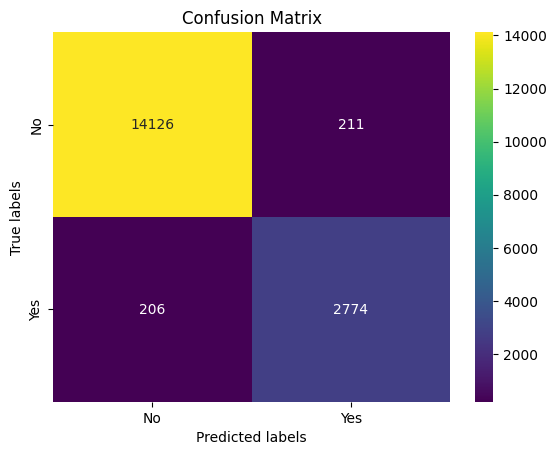

In [33]:
# Confusion matrix for model using 'LASSO'

# Confusion Matrix
confusion_L1 = metrics.confusion_matrix(y_test, y_pred_L1)

# Visualising the confusion matrix of our KNN model
labels = {'No', 'Yes'}
ax= plt.subplot()
sns.heatmap(confusion_L1, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

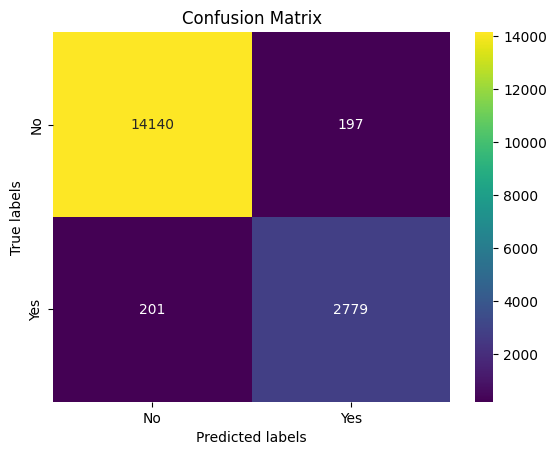

In [34]:
# Confusion matrix for model using 'RIDGE'

confusion_L2 = metrics.confusion_matrix(y_test, y_pred_L2)

# Visualising the confusion matrix of our KNN model
labels = {'No', 'Yes'}
ax= plt.subplot()
sns.heatmap(confusion_L2, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])


The confusion matrix shows that only very few records were classified as YES, and almost all of the records were classified as NO.

<div class="alert alert-block alert-success">**Start Activity 5**</div>

### <font color='brown'> Question 4: Explain if you see any differences between both confusion matrix in your own words</font>

<b> Write the answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity 5**</div>

## 5.3 Evaluating the model using F1 Score - L1-norm (LASSO)

In order to assess our model with a more suitable measure, we use the F1 score.

[This article](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/) is a very nice reading about evaluation metrics or performance measures


F1 scores need 'YES' to be 1 and 'NO' to be 0.

We build a new list in which 'YES' will be 1 and 'NO' will be 0:

In [35]:
from sklearn.metrics import f1_score
round(f1_score(y_test, y_pred_L1, pos_label='yes', average='binary'),3)

0.93

The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. As we can see, our predictive algorithm is not bad.

<div class="alert alert-block alert-success">**Start Activity 6**</div>

### <font color='brown'> Question 5: Repeat the process of evaluating the model using F1 Score, but for our logistic regression model using L2-norm regularization (RIDGE) </font>

In [36]:
# Write Python code here.
round(f1_score(y_test, y_pred_L2, pos_label='yes', average='binary'),3)

0.933

### <font color='brown'> Question 6: Use the 'classification_report' to list precision, recall, f1 score and support for each class. Repeat the process for both models.</font>

In [ ]:
# Write Python code here.



In [ ]:
# Write Python code here.



<div class="alert alert-block alert-warning">**End Activity 6**</div>

## 5.4 Receiver Operating Characteristic (ROC): TPR and FPR

[Information on `roc_curve`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

If you haven't seen [this video](https://www.youtube.com/watch?v=xugjARegisk) that explains ROC and AUC, I recommend it to you since this activity will be much clearer

### 5.4.1 Probability associated with each prediction
We need to determine the probability of each record in the test set being a 'YES', or equivalently a 1 as we have converted the response into a binary variable.

In [37]:
# Probabilities of the test set being 0 and 1: LASSO
y_pred_proba_L1 = Log_Reg_L1.predict_proba(X_test_scaled)[:,1]
y_pred_L1

print(y_pred_proba_L1[:5])
print(y_pred_L1[:5])

[0.02174235 0.0022365  0.00233536 0.99715615 0.00573143]
['no' 'no' 'no' 'yes' 'no']


In [38]:
# Probabilities of the test set being 0 and 1: RIDGE
y_pred_proba_L2 = Log_Reg_L2.predict_proba(X_test_scaled)[:,1]
y_pred_L2

print(y_pred_proba_L2[:5])
print(y_pred_L2[:5])

[0.04367252 0.00352995 0.00868533 0.99641578 0.01348252]
['no' 'no' 'no' 'yes' 'no']


### 5.4.2 Determining the fpr and tpr at each threshold value for logistic regression using Lasso (L1 Regularization)
Now that we have the probabilities associated with each prediction, we know exactly which records are predicted YES and NO for each choice of decision threshold. Hence, we can determine the false positive rate (fpr) and true positive rate (tpr) for threshold value.

In [39]:
from sklearn import metrics
y_test_binary = [0 if x=='no' else 1 for x in y_test]
fpr, tpr,thresholds= metrics.roc_curve(y_true = y_test_binary, y_score = y_pred_proba_L1)

# Defining dataframe with fpr and tpr at each threshold value for logistic regression using Lasso
df = pd.DataFrame()
df['fpr'] = fpr
df['tpr'] = tpr

# Check
print(thresholds[:5])

[1.99999959 0.99999959 0.9866157  0.98661166 0.97082001]


### 5.4.3 Plotting the ROC curve

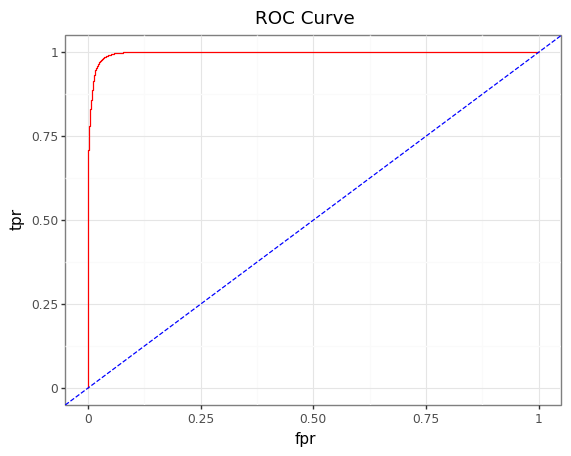

In [40]:
import plotnine as p9
import warnings; warnings.simplefilter('ignore')

p = p9.ggplot(mapping = p9.aes(x = fpr, y = tpr), data = df)
p += p9.geom_line(color = 'red')
p += p9.geom_abline(p9.aes(intercept=0, slope=1), linetype = 'dashed', colour = 'blue')
p += p9.labs(title = 'ROC Curve', x = 'fpr', y = 'tpr')
p += p9.theme_bw()

print(p)

### 5.4.4 Area Under the ROC curve (AUC)
Note that AUC = 0.5 corresponds to random assignment.

In [ ]:
print(round(metrics.roc_auc_score(y_true = y_test_binary, y_score = y_pred_proba_L1),3))

<div class="alert alert-block alert-success">**Start Activity 7**</div>

### <font color='brown'> Question 7: Repeat this process for the logistic regression model using Ridge (L2-norm regularization). Explain AUC metric in your own words </font>

In [ ]:
# Write Python code here. TIP: In this case we need to use 'y_pred_proba_L2'.

# Defining dataframe with fpr and tpr at each threshold value for logistic regression using Lasso


In [ ]:
# Write Python code here:


<b> Write the answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity 7**</div>

## 5.5 Explanation of how our models make predictions: Lime and Shap

### **Let’s first use Lime to interpret the predictions from the logistic regression model with L1-norm (Lasso)**

We will analyse how our logistic regression model with Lasso predicts 'readmission' with one patient. For this, we will assume that the first patient from the 'X_test' dataset is 'new' and that the model has not seen it in the training sample and has not been used in the test sample. Let's analyse this particular prediction using Lime.

In [ ]:
import lime
import lime.lime_tabular
import shap
import time

# Adding the explainer for Lime algorithm. More information: https://lime-ml.readthedocs.io/en/latest/lime.html
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled,
                                                   feature_names=X_train.columns.values.tolist(),
                                                   class_names=np.unique(y_train))

In [ ]:
# Get the explanation for our logistic regression model using Lasso
exp = explainer.explain_instance(X_test_scaled[0], Log_Reg_L1.predict_proba, num_features=10)
exp.show_in_notebook(show_all=False, show_table=True)

### **Let’s use Lime to interpret the predictions from the logistic regression model with L2-norm (Ridge).**

In [ ]:
# Get the explanation for our logistic regression model using Ridge
exp = explainer.explain_instance(X_test_scaled[0], Log_Reg_L2.predict_proba, num_features=10)
exp.show_in_notebook(show_all=False, show_table=True)

**Let's use SHAP explainer to compare results.**

<div class="alert alert-block alert-success">**Start Activity 8**</div>

### <font color='brown'> Question 8: Could you use SHAP summary plot to visualise both models in a global sense in order to summarise the effect of all the features in the 'X_train_scaled' dataset?. </font>

<p><font color='green'> Tip:  Please consider that we need to consider X_train_scaled for both models.</font></p>

<font color='green'> Explainer for Logistic Regression: `shap.LinearExplainer(ModelName, X_train_scaled, feature_dependence='independent')`.

<font color='green'> Getting shap value `LinearExplainer.shap_values(X_train_scaled)`

<font color='green'> Summary plot `shap.summary_plot(shap_value, X_train_scaled, feature_names = X_train.columns)`

<font color = 'green'> [SHAP reference](https://shap.readthedocs.io/en/latest/api.html)

<p><font color='green'> NB: It could take 20-30 minutes to run.

In [ ]:
# Write your Python code here (LASSO):

# Using SHAP to explain predictions
explainer_Model1 =


In [ ]:
# Summary plot - SHAP


In [ ]:
# Write your Python code here (RIDGE):

# Using SHAP to explain predictions
explainer_Model2 =

In [ ]:
# Summary plot - SHAP


### <font color='brown'> Question 9: Please briefly explain the results of the SHAP summary plot of Model 2 (Logistic Regression using Ridge). </font>

<b> Write the answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity 8**</div>

© 2022 Copyright The University of New South Wales - CRICOS 00098G